In [89]:
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Transformacion y limpieza de datos
 En este cuaderno realizamos la transformacion el los datos, usando los csv extraidos creamos un data frame con la informacion de los csv


In [90]:
shows = pd.read_csv("csv_shows_master_extraccion.csv")
eps = pd.read_csv("csv_episodios_extraccion.csv")

In [91]:
shows.head()

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26


In [92]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26851 entries, 0 to 26850
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26851 non-null  int64  
 1   name            26851 non-null  object 
 2   status          26803 non-null  object 
 3   start_date      26288 non-null  object 
 4   end_date        13568 non-null  object 
 5   network         26337 non-null  object 
 6   country         26828 non-null  object 
 7   runtime         26851 non-null  int64  
 8   rating          26851 non-null  float64
 9   rating_count    26851 non-null  int64  
 10  genres          23410 non-null  object 
 11  total_episodes  26851 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 2.5+ MB


In [93]:
shows.isnull().sum()
# cantidad de nulos por columnas

id                    0
name                  0
status               48
start_date          563
end_date          13283
network             514
country              23
runtime               0
rating                0
rating_count          0
genres             3441
total_episodes        0
dtype: int64

In [94]:
# analisis de los porcentages nulos por columnas
shows.isnull().sum()/len(shows)*100


id                 0.000000
name               0.000000
status             0.178764
start_date         2.096756
end_date          49.469294
network            1.914268
country            0.085658
runtime            0.000000
rating             0.000000
rating_count       0.000000
genres            12.815165
total_episodes     0.000000
dtype: float64

## Resumen Descriptivo de df show
Este DataFrame contiene 26,851 registros y 12 columnas, que ofrece informacion detallada de serie, se identifica el numero de faltantes por cada columna, con la intencion de identificar la infromacion faltante.

**Descripción de las columnas**: 

|Columna|Descripción|nulos|
|--|--|--|
|id|Identificador numérico de la serie| sin datos nulos|
|name|nombre de la serie|sin datos nulos|
|status|Estado (ej., 'En curso', 'Finalizada')| Tiene 48 nulos (0.17%)|
|start_date|Fecha de inicio.|Tiene 563 nulos (2.09%)|
|end_date|Fecha de finalización|Tiene 13,283  nulos (49.46)|
|network|Cadena de emision|Tiene 514 nulos(1.91%)|
|country|País de origen/producción|Tiene 23 nulos(0.8%)|
|runtime|Duración en minutos por capitulos |No contiene valores nulos|
|rating|Calificación|No contiene valores nulos|
|rating_count|Número de votos|No contiene valores nulos|
|genres |Géneros asociados|Tiene 3,441 nulo(12.81%)|
|total_episodes|Número total de episodios|No contiene valores nulos|


In [95]:
shows.describe()

,id,runtime,rating,rating_count,total_episodes
count,26851.000000,26851.000000,26851.000000,26851.000000,26851.000000
mean,23662.339652,45.137984,0.906148,0.699378,53.617891
std,22322.731878,35.181575,2.627692,14.505625,367.121015
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6797.500000,30.000000,0.000000,0.000000,1.000000
50%,13798.000000,30.000000,0.000000,0.000000,9.000000
75%,45103.500000,60.000000,0.000000,0.000000,26.000000
max,93999.000000,1480.000000,10.000000,1627.000000,20369.000000


In [96]:
eps.tail(5)
#mustra los ultimos 5

,season,episode,name,air_date,show_id
1962134,3,11,Серия 11,2025-05-01 00:00:00,93998
1962135,3,12,Серия 12,2025-05-01 00:00:00,93998
1962136,3,13,Серия 13,2025-05-01 00:00:00,93998
1962137,3,14,Серия 14,2025-05-01 00:00:00,93998
1962138,3,15,Серия 15,2025-09-01 00:00:00,93998


In [97]:
eps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962139 entries, 0 to 1962138
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   season    int64 
 1   episode   int64 
 2   name      object
 3   air_date  object
 4   show_id   int64 
dtypes: int64(3), object(2)
memory usage: 74.8+ MB


In [98]:
eps.isnull().sum()
# cantidad de nulos por columnas

season       0
episode      0
name        21
air_date     0
show_id      0
dtype: int64

## Resumen Descriptivo de df eps
Este DataFrame es considerablemente más grande que el anterior, conteniendo 1,962,139 registros y 5 columnas. Se identifica el numero de faltantes por cada columna, con la intencion de identificar la infromacion faltante.

**Descripción de las columnas**: 

|Columna|Descripción|nulos|
|--|--|--|
|season|Número de la temporada| sin datos nulos|
|episode |Número de episodio| sin datos nulos|
|name|Título del episodio|Tiene 21 nulos|
|air_date|Fecha de emisión|sin datos nulos|
|show_id|Fecha de inicio.|sin datos nulos|


## Transformacion de columna fechas a date.time
 Se a identificado que las columnas de fecha no estan en formato date, se realizara la conversion a date.time



In [99]:
shows.head(2)

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65


In [100]:
shows['new_start_date']=pd.to_datetime(shows['start_date'],format='%Y-%m-%d',
    errors='coerce'  # 'coerce' convierte fallos en NaT
)
shows.head()

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13,NaT
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,NaT


In [101]:
shows['new_start_date'] = shows['new_start_date'].fillna(
    pd.to_datetime(
        shows['start_date'],
        format='%b/%d/%Y',  # Nota: usamos formato %b por que el mes esta dado por las 3 primeras letras.
        errors='coerce'
    )
)
shows.head()# la columa new star date tiene un solo formato y tipo dt

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01


In [102]:
# Muestra el tipo de dato
print(shows['new_start_date'].dtype)

datetime64[ns]


In [103]:
shows['new_end_date']=pd.to_datetime(shows['end_date'],format='%Y-%m-%d',#para convertir a este formato
    errors='coerce'  # 'coerce' convierte fallos en NaT
)
shows.head()

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,NaT
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,NaT


In [104]:
shows['new_end_date'] = shows['new_end_date'].fillna(
    pd.to_datetime(
        shows['end_date'],
        format='%b/%d/%Y',  # Nota: usamos formato %b por que el mes esta dado por las 3 primeras letras.
        errors='coerce'
    )
)
shows.head()

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05


In [105]:
print(shows['new_end_date'].dtype)

datetime64[ns]


In [106]:
eps.head()

,season,episode,name,air_date,show_id
0,1,1,Talk to a Jew,1977-07-04 16:00:00,1
1,1,2,Leisure Suits Cause Cancer,1977-07-05 16:00:00,1
2,1,3,The Wonderblender,1977-07-06 16:00:00,1
3,1,4,Corporal Punishment I,1977-07-07 16:00:00,1
4,1,5,Corporal Punishment II,1977-07-08 16:00:00,1


In [107]:
print(eps['air_date'].dtype)

object


In [108]:
eps['air_date']=pd.to_datetime(eps['air_date'],format='%Y-%m-%d %H:%M:%S',errors='coerce')#formatiamos a dt 

In [109]:
eps['air_date'] = eps['air_date'].dt.normalize()
eps.head() #columna en formato año-mes-dia

,season,episode,name,air_date,show_id
0,1,1,Talk to a Jew,1977-07-04,1
1,1,2,Leisure Suits Cause Cancer,1977-07-05,1
2,1,3,The Wonderblender,1977-07-06,1
3,1,4,Corporal Punishment I,1977-07-07,1
4,1,5,Corporal Punishment II,1977-07-08,1


In [110]:
print(eps['air_date'].dtype)

datetime64[ns]


In [111]:
# 3. Calcular la fecha más antigua por show
df_min_dates = eps.groupby('show_id')['air_date'].min().reset_index()

# 4. Renombrar columnas (Aquí usamos 'first_episode')
# Cambiamos 'show_id' a 'id' para el cruce, y 'air_date' a 'first_episode'
df_min_dates.rename(columns={'show_id': 'id', 'air_date': 'first_episode'}, inplace=True)

# 5. Unir (Merge) los DataFrames
# Usamos 'left' para mantener todos los shows del archivo maestro
df_final = pd.merge(shows, df_min_dates, on='id', how='left')

# Ver el resultado
#print(df_final[['id', 'name', 'first_episode']].head(10))
df_final.head(7)

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT,1977-07-04
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT,1978-04-10
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT,1976-01-05
3,4,Sara (1985),Canceled/Ended,Jan/23/1985,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24
4,5,Buffalo Bill,Canceled/Ended,Jun/01/1983,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01
5,6,The Rousters,Canceled/Ended,Oct/01/1983,Jul/21/1984,NBC,US,60,0.0,0,Adventure,13,1983-10-01,1984-07-21,1983-10-02
6,7,Paper Dolls,To Be Determined,2023-12-03,NaN,Paramount+,US,10,7.0,1,"Drama, Music",12,2023-12-03,NaT,1984-12-05


In [112]:
df_final['start_date'] = np.minimum(
    df_final['new_start_date'],      # Columna 1
    df_final['first_episode']    # Columna 2
)
df_final.head(7)# tenemos el valor real de la fecha de emision en start_date

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT,1977-07-04
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT,1978-04-10
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT,1976-01-05
3,4,Sara (1985),Canceled/Ended,1985-01-23,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24
4,5,Buffalo Bill,Canceled/Ended,1983-06-01,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01
5,6,The Rousters,Canceled/Ended,1983-10-01,Jul/21/1984,NBC,US,60,0.0,0,Adventure,13,1983-10-01,1984-07-21,1983-10-02
6,7,Paper Dolls,To Be Determined,1984-12-05,NaN,Paramount+,US,10,7.0,1,"Drama, Music",12,2023-12-03,NaT,1984-12-05


In [113]:
df_final['On_air_Time'] = df_final['new_end_date']-df_final['start_date']
df_final.head(7)


,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT,1977-07-04,NaT
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT,1978-04-10,NaT
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT,1976-01-05,NaT
3,4,Sara (1985),Canceled/Ended,1985-01-23,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24,105 days
4,5,Buffalo Bill,Canceled/Ended,1983-06-01,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01,309 days
5,6,The Rousters,Canceled/Ended,1983-10-01,Jul/21/1984,NBC,US,60,0.0,0,Adventure,13,1983-10-01,1984-07-21,1983-10-02,294 days
6,7,Paper Dolls,To Be Determined,1984-12-05,NaN,Paramount+,US,10,7.0,1,"Drama, Music",12,2023-12-03,NaT,1984-12-05,NaT


## Analisis y visualizacion
 Se analiza columna On_air_Time y grafico.
 esta columna muestra el tiempop en dias de las series finalizadas o canceladas.


In [114]:
# Calcula la media, la mediana y la desviación estandar para cada columna numérica.

print(f'Columna: runtime, Media: {df_final["runtime"].mean()}, Median: {df_final["runtime"].median()}, std: {df_final["runtime"].std()}')
print(f'Columna: rating, Media: {df_final["rating"].mean()}, Median: {df_final["rating"].median()}, std: {df_final["rating"].std()}')
print(f'Columna: rating_count, Media: {df_final["rating_count"].mean()}, Median: {df_final["rating_count"].median()}, std: {df_final["rating_count"].std()}')
print(f'Columna: total_episodes, Media: {df_final["total_episodes"].mean()}, Median: {df_final["total_episodes"].median()}, std: {df_final["total_episodes"].std()}')



Columna: runtime, Media: 45.13798368775837, Median: 30.0, std: 35.181575173285964
Columna: rating, Media: 0.9061480838702468, Median: 0.0, std: 2.62769239163574
Columna: rating_count, Media: 0.6993780492346654, Median: 0.0, std: 14.50562515894819
Columna: total_episodes, Media: 53.61789132620759, Median: 9.0, std: 367.12101473814954


In [115]:
# Crea un filtro booleano: True si el valor NO es nulo, False si es nulo (NaT)
filtro_dias_validos = df_final['On_air_Time'].notna()

# Aplica el filtro al DataFrame original para obtener solo las filas con datos de duración válidos
df_solo_dias = df_final[filtro_dias_validos]


print(f"Filas totales originales: {len(df_final)}") 
print(f"Filas después de filtrar (solo 'days'): {len(df_solo_dias)}") # las series finalizadas 
df_solo_dias.head()

Filas totales originales: 26851
Filas después de filtrar (solo 'days'): 5959


,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
3,4,Sara (1985),Canceled/Ended,1985-01-23,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24,105 days
4,5,Buffalo Bill,Canceled/Ended,1983-06-01,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01,309 days
5,6,The Rousters,Canceled/Ended,1983-10-01,Jul/21/1984,NBC,US,60,0.0,0,Adventure,13,1983-10-01,1984-07-21,1983-10-02,294 days
9,10,Bob & Carol & Ted & Alice,Canceled/Ended,1973-09-26,Nov/07/1973,ABC,US,30,10.0,1,Comedy,7,1973-09-26,1973-11-07,1973-09-27,42 days
10,11,USA High,Canceled/Ended,1997-08-04,Jun/10/1999,USA Network,US,30,10.0,1,Comedy,95,1997-08-04,1999-06-10,1997-08-04,675 days


In [116]:
df_solo_dias = df_solo_dias.sort_values(by='On_air_Time')
df_solo_dias.head(6)


,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
22597,47792,The Kangaroo Gang,Ended,2014-02-09,Feb/16/2004,ABC2,AU,60,0.0,0,"Crime, Drama",2,2014-02-09,2004-02-16,2014-02-09,-3646 days
21455,46589,Vyprávěj,Ended,2009-08-31,Jun/14/2003,Česká televize,CZ,52,0.0,0,"Drama, History, Adventure, Teens, Children, Au...",24,2009-08-31,2003-06-14,2009-08-31,-2270 days
21739,46874,Fugitive lawyer,Ended,2010-07-06,Sep/14/2006,Fuji TV,JP,45,0.0,0,"Crime, Action, Thriller",11,2010-07-06,2006-09-14,2010-07-06,-1391 days
17926,29474,De Flandriens van het veld,New Series,2011-12-26,Jan/30/2011,Canvas,BE,55,0.0,0,"Interview, Sports, Current Events",6,2011-12-26,2011-01-30,2011-12-26,-330 days
16414,17410,Hancock & Joan,Canceled/Ended,2008-03-26,Mar/25/2008,BBC FOUR,GB,90,0.0,0,Drama,1,2008-03-26,2008-03-25,2008-03-26,-1 days
14106,14721,2057,Canceled/Ended,2007-01-28,Jan/28/2007,Discovery Channel,US,60,0.0,0,Sci-Fi,3,2007-01-28,2007-01-28,2007-01-29,0 days


Se analiza columna On_air_Time, encontramos valores negativos y al comprobar vemos un error en el ingreso de la informacion, por lo que vamos a filtrar los datos igual o mayo a cero en la columna.


In [117]:
df_solo_dias=df_solo_dias[(df_solo_dias["On_air_Time"] > pd.Timedelta(0))]
df_solo_dias.head(6)



,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
20495,45513,Tormenta,Ended,2013-08-01,Aug/02/2013,Antena 3,ES,45,0.0,0,"Drama, Action, Teens, Competition",2,2013-08-01,2013-08-02,2013-08-01,1 days
21357,46490,Wild Pacific,Ended,2009-07-12,Jul/13/2009,Discovery Channel,US,60,0.0,0,"Educational, Outdoors/Wildlife",6,2009-07-12,2009-07-13,2009-07-13,1 days
21913,47073,Крыса,Ended,2010-09-25,Sep/26/2010,РТР,RU,45,0.0,0,"Drama, Romance/Dating",4,2010-09-25,2010-09-26,2010-09-25,1 days
12819,13084,The Path to 9/11,Canceled/Ended,2006-09-10,Sep/11/2006,ABC,US,240,0.0,0,"Drama, Action",2,2006-09-10,2006-09-11,2006-09-10,1 days
21855,47015,Welt am Draht,Ended,1973-10-14,Oct/15/1973,WDR,DE,105,0.0,0,"Crime, Sci-Fi",2,1973-10-14,1973-10-15,1973-10-14,1 days
5920,5996,The Old Curiosity Shop (US),Canceled/Ended,1995-03-19,Mar/20/1995,DiSNEY CHANNEL,US,240,0.0,0,Drama,2,1995-03-19,1995-03-20,1995-03-19,1 days


In [118]:
# serie con mas dias en emision
df_solo_dias.sort_values("On_air_Time", ascending = False).head(1)

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
4328,4398,Merrie Melodies,Canceled/Ended,1930-04-19,Nov/02/2004,FOX,US,7,0.0,0,Animation General,7,1930-04-19,2004-11-02,1930-04-19,27226 days


## Analisis y visualizacion
 Se analiza los top 10 de network, country, genres, series con mas episodios y su respectivo grafico.



In [119]:
# analisis de network top 10
df_network=df_final.groupby('network')['network'].count()
df_network = df_network.sort_values(ascending=False)
total_general = df_network.sum()
ponderacion = df_network / total_general
porcentaje = ponderacion * 100
df_resumen_network = pd.DataFrame({
    'Conteo': df_network,
    'Porcentaje (%)': porcentaje.round(2), # Redondeamos a 2 decimales
})
print(f"total:{len(df_final)}")
df_resumen_network.head(10)


total:26851


,Conteo,Porcentaje (%)
network,,
ABC,1777,6.75
BBC one,1434,5.44
NBC,1261,4.79
itv,1242,4.72
CBS,1204,4.57
BBC TWO,688,2.61
Channel 4,669,2.54
Syndicated,547,2.08
FOX,433,1.64


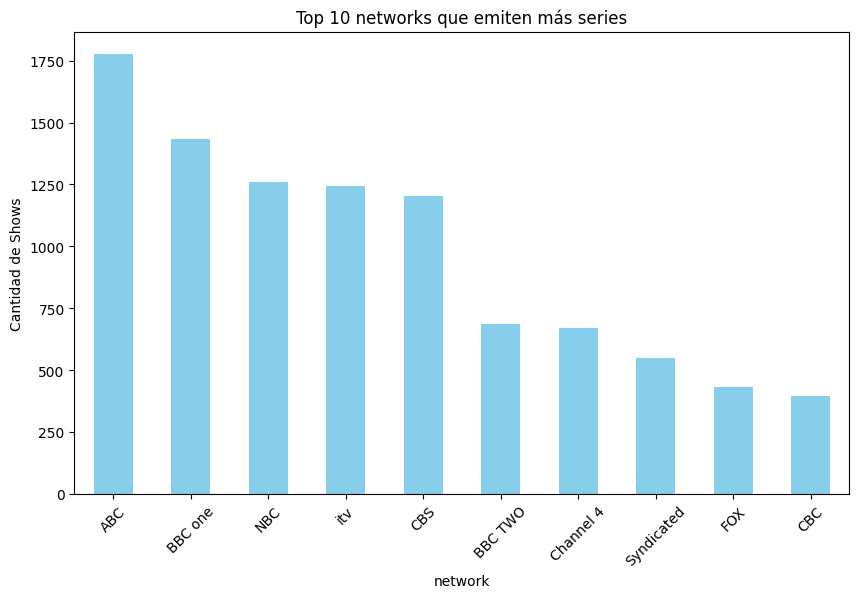

In [120]:
#grafica network top 10
top_10_network = df_network.head(10)


top_10_network.plot(kind='bar', color='skyblue', figsize=(10, 6))


plt.title('Top 10 networks que emiten más series')
plt.xlabel('network')
plt.ylabel('Cantidad de Shows')
plt.xticks(rotation=45) # Rotar los nombres para que no se encimen
plt.show()

In [121]:
# analisis de paises top 10
df_country	=df_final.groupby('country')['country'].count()
df_country= df_country.sort_values(ascending=False)
total_general = df_country.sum()
ponderacion = df_country/ total_general
porcentaje = ponderacion * 100
df_resumen_country	 = pd.DataFrame({
    'Conteo': df_country,
    'Porcentaje (%)': porcentaje.round(2), 
   # Redondeamos a 2 decimales
})
print(f"total:{len(df_final)}")
df_resumen_country.head(10)


total:26851


,Conteo,Porcentaje (%)
country,,
US,11143,41.53
GB,7075,26.37
JP,1992,7.43
AU,1610,6.00
CA,1041,3.88
RU,556,2.07
KR,544,2.03
DE,239,0.89
NL,211,0.79


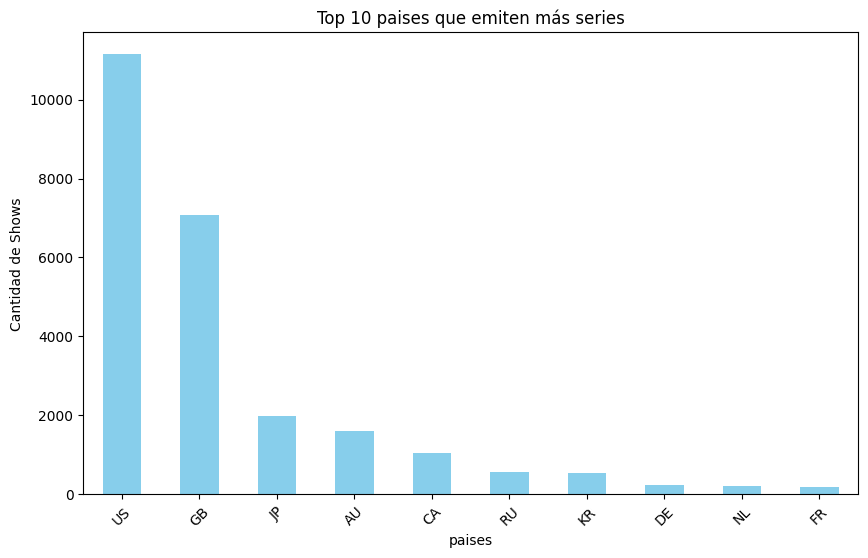

In [122]:
#grafica paises top 10
top_10_paises = df_country.head(10)


top_10_paises.plot(kind='bar', color='skyblue', figsize=(10, 6))


plt.title('Top 10 paises que emiten más series')
plt.xlabel('paises')
plt.ylabel('Cantidad de Shows')
plt.xticks(rotation=45) # Rotar los nombres para que no se amontonen
plt.show()

In [123]:
# DataFrame de generos por show
df_genres = pd.DataFrame(data = df_final[["id", "genres"]], columns = ["id", "genres"])

df_genres["genres"] = df_genres["genres"].apply(lambda x : x.split(", ") if not pd.isna(x) else x)

df_genres = df_genres.explode("genres")

# analisis de generos
df_genres=df_genres.groupby('genres')['genres'].count()
df_genres = df_genres.sort_values(ascending=False)
total_general = df_genres.sum()
ponderacion = df_genres / total_general
porcentaje = ponderacion * 100
df_resumen_genres = pd.DataFrame({
    'Conteo': df_genres,
    'Porcentaje (%)': porcentaje.round(2), 
   # Redondeamos a 2 decimales
})
print(f"total:{len(df_final)}")
df_resumen_genres.head(10)



total:26851


,Conteo,Porcentaje (%)
genres,,
Drama,6810,15.42
Comedy,6592,14.92
Family,2814,6.37
Adventure,2064,4.67
Action,1913,4.33
Crime,1715,3.88
Children,1670,3.78
Music,1374,3.11
Anime,1218,2.76


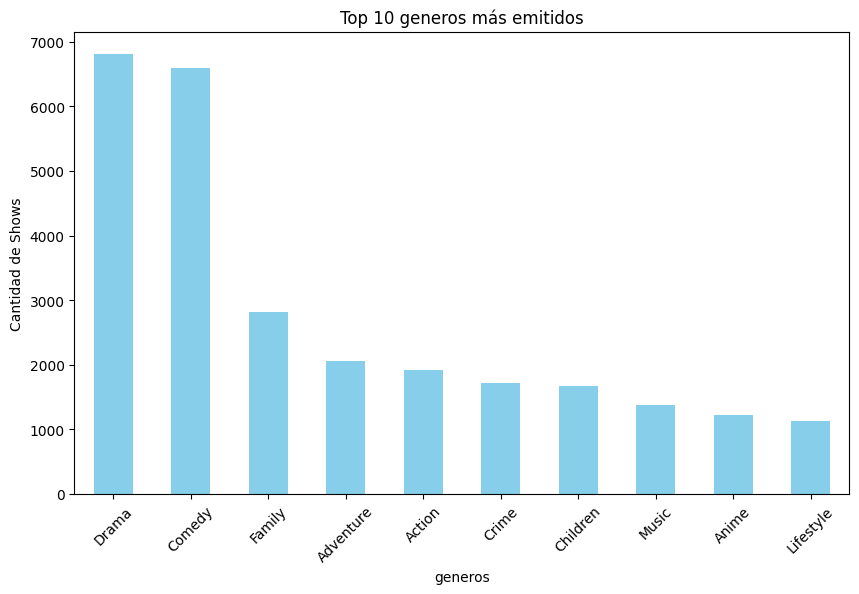

In [124]:
#grafica generos top 10
top_10_generos = df_genres.head(10)


top_10_generos.plot(kind='bar', color='skyblue', figsize=(10, 6))


plt.title('Top 10 generos más emitidos')
plt.xlabel('generos')
plt.ylabel('Cantidad de Shows')
plt.xticks(rotation=45) 
plt.show()

In [125]:
# top 10 de las series con mas episodios
df_top10eps = df_final.sort_values(by='total_episodes',ascending=False)
df_vista_personalizada = df_top10eps[['name','total_episodes']]                              
df_vista_personalizada.head(10)


,name,total_episodes
3142,Days of Our Lives,20369
4507,Neighbours,18290
3303,EastEnders,13487
5494,The Bold and the Beautiful,13457
6096,Today,11355
3029,Coronation Street,10751
3598,Good Morning America,10406
6831,Wheel of Fortune,10255
3323,Emmerdale,9967
17243,"Goede Tijden, Slechte Tijden",8770


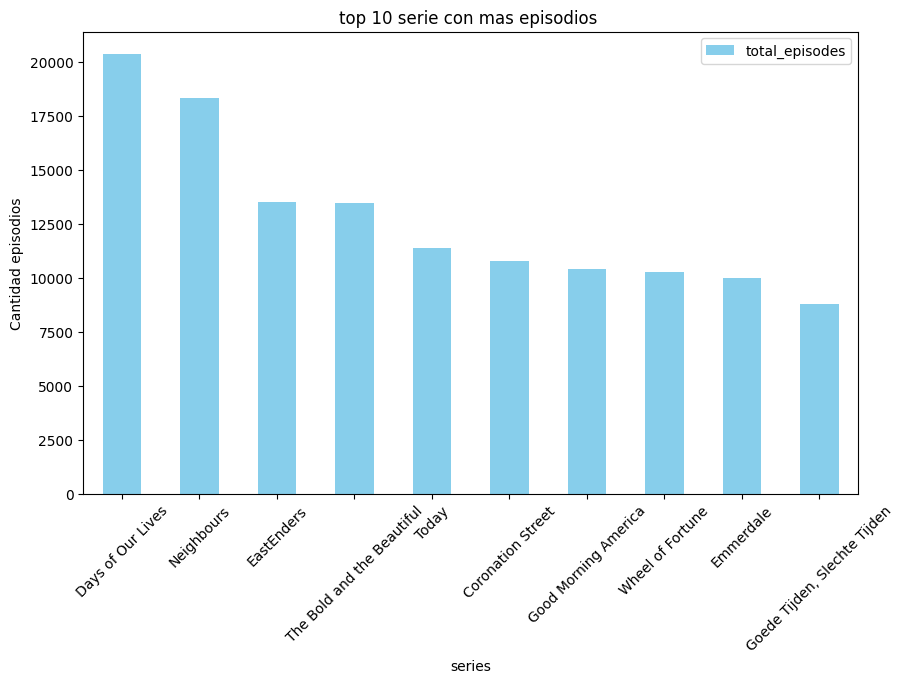

In [126]:
#grafica top 10 serie con mas episodio 
df_vista_personalizada = df_vista_personalizada.head(10)


df_vista_personalizada.plot(x='name',kind='bar', color='skyblue', figsize=(10, 6))


plt.title('top 10 serie con mas episodios ')
plt.xlabel('series')
plt.ylabel('Cantidad episodios')
plt.xticks(rotation=45) 
plt.show()

## Analisis y visualizacion
 Se analiza cual es el rankin medio por cadena, para definir cual es la cadena que mejor series emite.



In [127]:
df_final.head()


,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT,1977-07-04,NaT
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT,1978-04-10,NaT
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT,1976-01-05,NaT
3,4,Sara (1985),Canceled/Ended,1985-01-23,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24,105 days
4,5,Buffalo Bill,Canceled/Ended,1983-06-01,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01,309 days


In [128]:
# --- 1. Calcular el Rating Medio por Network ---
# Agrupamos por 'network' y calculamos la media de la columna 'rating'.
df_rating_medio = df_final.groupby('network')['rating'].mean()

# Cambiamos el nombre de la Serie resultante para que sea una columna clara
df_rating_medio.name = 'Rating Medio'

# --- 3. Unir (Join) el Rating Medio al Resumen ---
# Usamos .join() porque el índice de ambos DataFrames/Series es 'network'.
df_resumen_final = df_resumen_network.join(df_rating_medio)

# Ordenar el resultado final por 'Conteo' de nuevo (de mayor a menor)
df_resumen_final = df_resumen_final.sort_values(by='Conteo', ascending=False)


# --- 4. Mostrar el Top 10 ---
print(f"Total de registros analizados: {len(df_final)}")
df_top_10_final = df_resumen_final.head(10)
print(df_top_10_final)


Total de registros analizados: 26851
            Conteo  Porcentaje (%)  Rating Medio
network                                         
ABC           1777            6.75      0.790596
BBC one       1434            5.44      0.259530
NBC           1261            4.79      0.937567
itv           1242            4.72      0.371176
CBS           1204            4.57      1.189622
BBC TWO        688            2.61      0.226502
Channel 4      669            2.54      0.481481
Syndicated     547            2.08      0.508836
FOX            433            1.64      1.664237
CBC            396            1.50      0.377622


## Analisis y visualizacion
 Se analiza cual es el numero de series por decada.


In [129]:
df_final.head()

,id,name,status,start_date,end_date,network,country,runtime,rating,rating_count,genres,total_episodes,new_start_date,new_end_date,first_episode,On_air_Time
0,1,Fernwood 2Night,Ended,1977-07-04,NaN,Syndication,US,30,0.0,0,Comedy,65,1977-07-04,NaT,1977-07-04,NaT
1,2,America 2Night,Ended,1978-04-10,NaN,Syndication,US,30,0.0,0,Comedy,65,1978-04-10,NaT,1978-04-10,NaT
2,3,"Mary Hartman, Mary Hartman",Ended,1976-01-05,NaN,Syndication,US,30,0.0,0,Comedy,325,1976-01-05,NaT,1976-01-05,NaT
3,4,Sara (1985),Canceled/Ended,1985-01-23,May/08/1985,NBC,US,30,0.0,0,Comedy,13,1985-01-23,1985-05-08,1985-01-24,105 days
4,5,Buffalo Bill,Canceled/Ended,1983-06-01,Apr/05/1984,NBC,US,30,0.0,0,Comedy,26,1983-06-01,1984-04-05,1983-06-01,309 days


In [130]:
# Extraer el año de la columna 'start_date'
df_final['Año'] = df_final['start_date'].dt.year

# Calcular la década de inicio: (Año // 10) * 10
# 1985 // 10 = 198 -> 198 * 10 = 1980
# 2023 // 10 = 202 -> 202 * 10 = 2020
df_final['Decada'] = (df_final['Año'] // 10) * 10

# Opcional: Convertir la década a formato string (ej. '1980s')
df_final['Etiqueta_Decada'] = df_final['Decada'].astype(str) + 's'

print("--- DataFrame con Columna de Década ---")
print(df_final[['start_date', 'Etiqueta_Decada']])

--- DataFrame con Columna de Década ---
      start_date Etiqueta_Decada
0     1977-07-04         1970.0s
1     1978-04-10         1970.0s
2     1976-01-05         1970.0s
3     1985-01-23         1980.0s
4     1983-06-01         1980.0s
...          ...             ...
26846 2025-08-22         2020.0s
26847        NaT            nans
26848 2025-03-28         2020.0s
26849 2018-05-31         2010.0s
26850        NaT            nans

[26851 rows x 2 columns]


In [131]:
# Contar la frecuencia de registros por cada década
conteo_por_decada = df_final.groupby('Etiqueta_Decada')['start_date'].count()

# Ordenar las décadas cronológicamente
conteo_por_decada = conteo_por_decada.sort_index()

print("\n--- Conteo Agrupado por Década ---")
print(conteo_por_decada)


--- Conteo Agrupado por Década ---
Etiqueta_Decada
1920.0s       2
1930.0s       3
1940.0s      54
1950.0s     503
1960.0s     685
1970.0s     988
1980.0s    1209
1990.0s    2192
2000.0s    5323
2010.0s    5950
2020.0s    1245
nans          0
Name: start_date, dtype: int64


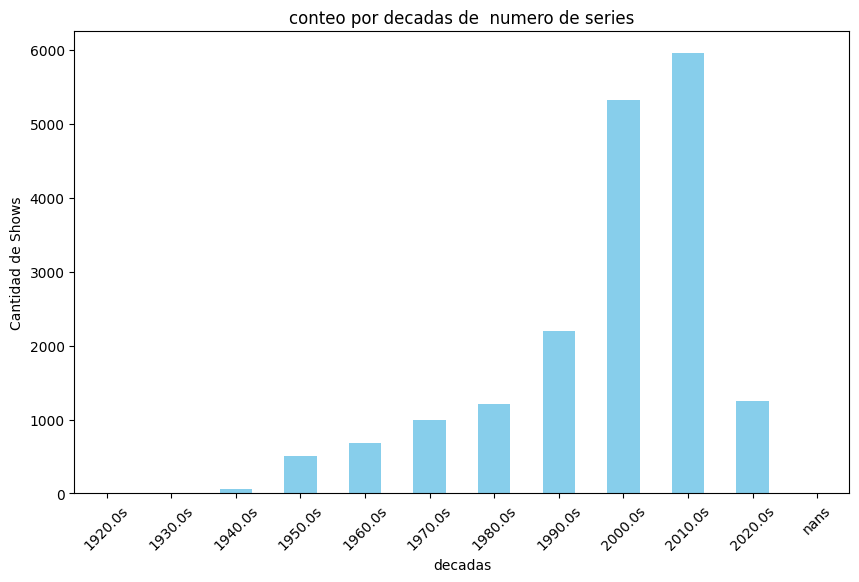

In [132]:
#grafica conteo por decadas de  numero de series.
conteo_por_decada.plot(kind='bar', color='skyblue', figsize=(10, 6))


plt.title('conteo por decadas de  numero de series')
plt.xlabel('decadas')
plt.ylabel('Cantidad de Shows')
plt.xticks(rotation=45)
plt.show()